<a href="https://colab.research.google.com/github/SergeyMitrofanov88/Optimization_scripts/blob/main/Non_linear_opt_(LW2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import *
from scipy import optimize
import pandas as np

DayGraph = [ 0.4, 0.4, 0.45, 0.6, 0.65, 0.8, 0.75, 0.7, 0.65, 1, 0.9, 0.7]
print(DayGraph)

Pn = 770 #активная составляющая нагрузки
P1_list = []
P2_list = []
LoadNagr_list = []
print(LoadNagr_list)
#Оптимизация без учета потерь в линии с графиком нагрузки
for i in range(12):
  Pgraph = Pn * DayGraph[i]
  LoadNagr_list.append(Pgraph)
  def f(x):
    return (40+0.6*x+0.01*x**2)-(30+0.2*(Pgraph - x)+0.03*(Pgraph-x)**2)
  x0 = 0
  sol = optimize.root(f,x0, method='krylov')
  P1 = sol.x
  P1_list.append(float(P1))
  print('Период времени', i+1)
  print('P1 =', P1, 'kW')
  #Рассчитаем мощность второй станции
  P2 = Pgraph - P1
  P2_list.append(P2)
  print('P2 = ',P2,'kW')



[0.4, 0.4, 0.45, 0.6, 0.65, 0.8, 0.75, 0.7, 0.65, 1, 0.9, 0.7]
[]
Период времени 1
P1 = 186.28391989054234 kW
P2 =  121.71608010945766 kW
Период времени 2
P1 = 186.28391989054234 kW
P2 =  121.71608010945766 kW
Период времени 3
P1 = 210.70336567625452 kW
P2 =  135.79663432374548 kW
Период времени 4
P1 = 283.95105156403685 kW
P2 =  178.04894843596315 kW
Период времени 5
P1 = 308.36467631617666 kW
P2 =  192.13532368382334 kW
Период времени 6
P1 = 381.6015647032214 kW
P2 =  234.3984352967786 kW
Период времени 7
P1 = 357.18980717225827 kW
P2 =  220.31019282774173 kW
Период времени 8
P1 = 332.7775474118607 kW
P2 =  206.22245258813928 kW
Период времени 9
P1 = 308.36467631617666 kW
P2 =  192.13532368382334 kW
Период времени 10
P1 = 479.2450143537721 kW
P2 =  290.7549856462279 kW
Период времени 11
P1 = 430.4238916098608 kW
P2 =  262.5761083901392 kW
Период времени 12
P1 = 332.7775474118607 kW
P2 =  206.22245258813928 kW


In [ ]:
dframe1 = np.DataFrame(list(zip(DayGraph, P1_list, P2_list, LoadNagr_list)), columns=['Load', 'P1', 'P2', "Pn"])
dframe1

,Load,P1,P2,Pn
0,0.40,186.283920,121.716080,308.0
1,0.40,186.283920,121.716080,308.0
2,0.45,210.703366,135.796634,346.5
3,0.60,283.951052,178.048948,462.0
4,0.65,308.364676,192.135324,500.5
5,0.80,381.601565,234.398435,616.0
6,0.75,357.189807,220.310193,577.5
7,0.70,332.777547,206.222453,539.0
8,0.65,308.364676,192.135324,500.5
9,1.00,479.245014,290.754986,770.0


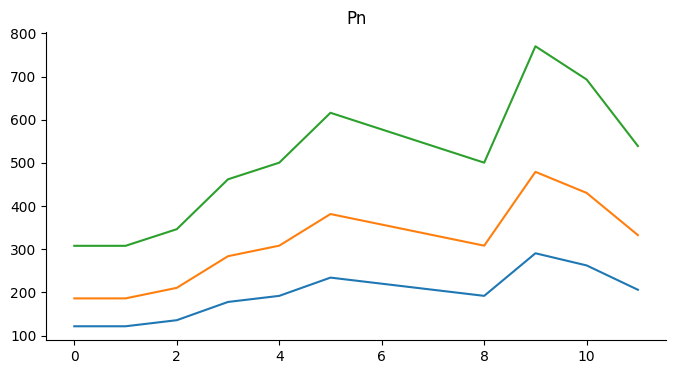

In [ ]:
from matplotlib import pyplot as plt
dframe1['P2'].plot(kind='line', figsize=(8, 4), title='P2')
plt.gca().spines[['top', 'right']].set_visible(False)
dframe1['P1'].plot(kind='line', figsize=(8, 4), title='P1')
plt.gca().spines[['top', 'right']].set_visible(False)
dframe1['Pn'].plot(kind='line', figsize=(8, 4), title='Pn')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Оптимизация с учетом потерь в линии
U1= 220 #напряжение на шинах первой ЭС
U2 = 242 #напряжение на шинах второй ЭС
Q1 = 25
Q2 = 30
r1 = 8 #активное сопротивление линии 1-3
r2 = 5 #активное сопротивление линии 2-3
P11 = sol.x
P2g = Pn - P11
deltaP = (((P11**2 + Q1**2)*r1)/U1**2) + (((P2g**2 + Q2**2)*r2)/U2**2)
print('dP = ', deltaP, 'kW')
sigma = ((2*P1)*r1)/(U1**2)
print('Значение коэффициента сигма =',sigma)
Pn = 770 #активная составляющая нагрузки
def f(x1):
  return ((40+0.6*x1+0.01*x1**2)/(1-sigma))-(30+0.2*(Pn - x1)+0.03*(Pn-x1)**2)
x0 = 0
sol = optimize.root(f,x0, method='krylov')
print('Solution:\n', sol.x)
print('krylov method iteration =', sol.nit)
print('P2g = ',P2g)
Balance = P11 + P2g - Pn - sigma
print('Balance = ', Balance)


dP =  34.80532817278201 kW
Значение коэффициента сигма = 0.11000910658243329
Solution:
 468.1727628779648
krylov method iteration = 5
P2g =  437.2224525881393
Balance =  -0.11000910658243329
